In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X,Y = make_blobs(500,2,centers=4,cluster_std=1)

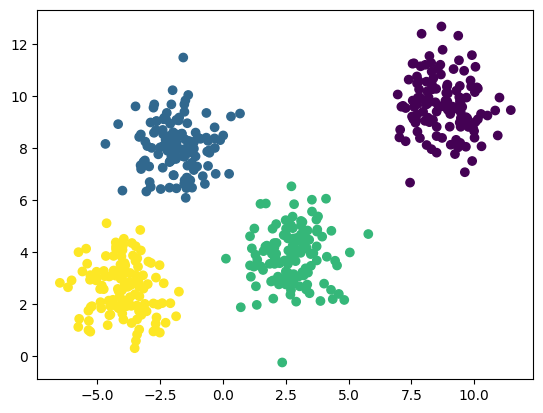

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [26]:
def intializeClusters(k,n_features=2,max = 10,min = -10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['Center'] = (max-min)*np.random.random((2,))+min
        cluster['Points'] = []
        clusters.append(cluster)
    return clusters

In [27]:
intializeClusters(4)

[{'Center': array([-0.39121289, -9.1428357 ]), 'Points': []},
 {'Center': array([-1.82587915,  2.52219835]), 'Points': []},
 {'Center': array([-4.34170463, -5.6128322 ]), 'Points': []},
 {'Center': array([-0.93441383,  5.82040983]), 'Points': []}]

In [28]:
def distance(v1,v2):
    return np.sqrt(np.sum((v2-v1)**2))

In [38]:
def assignPoints(X,clusters):
    for i in range(X.shape[0]):
        curX = X[i]
        dist = []
        for nc in range(len(clusters)):
            dist.append(distance(curX,clusters[nc]['Center']))
        nc = np.argmin(dist)
        clusters[nc]['Points'].append(curX)

def updateClusters(clusters):
    for i in range(len(clusters)):
        if len(clusters[i]['Points']) > 0:
            clusters[i]['Center'] = np.mean(clusters[i]['Points'],axis=0)
            clusters[i]['Points'] = []

def plotClusters(clusters):
    for i in range(len(clusters)):
        pnts = np.array(clusters[i]['Points'])
        try:
            plt.scatter(pnts[:,0],pnts[:,1])
        except:
            pass
        cent = clusters[i]['Center']
        plt.scatter(cent[0],cent[1],c='black')
    plt.show()

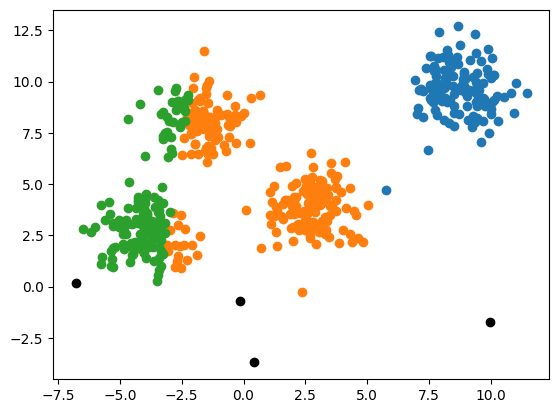

In [39]:
clusters = intializeClusters(4)
assignPoints(X,clusters)
plotClusters(clusters)
# clusters

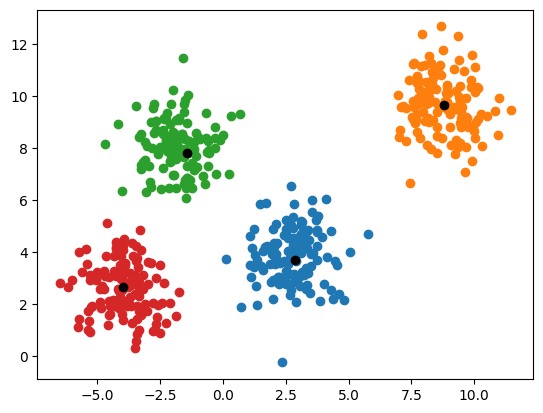

In [43]:
updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)

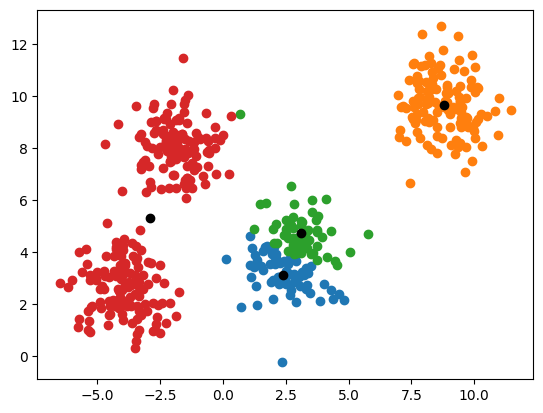

In [57]:
k = 4
clusters = intializeClusters(k,X.shape[1])
for i in range(100):
    assignPoints(X,clusters)
    updateClusters(clusters)
assignPoints(X,clusters)
plotClusters(clusters)